In [5]:
import numpy as np
import re
import glob
import seaborn as sns

In [6]:
list_logs_path = glob.glob("logs_forth_try/*.log")
list_logs_path

['logs_forth_try\\output_3200_hira.log',
 'logs_forth_try\\output_5000_hira.log']

In [7]:
def read_and_show_logs(logs):
    logs = []

    # Read and append all log into one data
    for idx, log in enumerate(list_logs_path):
        with open(log, 'r') as f:
            lines = f.readlines()
        f.close()
        logs.extend(lines)

    logs = np.asarray(logs)
    
    # Looping through logs list
    # This operation below is main operation to extract the Loss Average and Iteration which necessary for Plotting

    iteration_list = []
    avg_loss_list = []
    for idx, log in enumerate(logs):
        temp = log.replace("\n", "")
        temp = log.strip()
        if "next mAP calculation at" in temp:
            # Get the second line to extract the information
            data = logs[idx + 1]

            # Preprocess for removing \n and any space in front and rear
            data = data.replace("\n", "")
            data = data.strip()

            # Get the data
            iteration = int(data.split(",")[0].split(":")[0])
            avg_loss = float(data.split(",")[1].split(" ")[1])

            iteration_list.append(iteration)
            avg_loss_list.append(avg_loss)
        else:
            continue
        
    iteration_list = np.asarray(iteration_list)
    avg_loss_list = np.asarray(avg_loss_list)    
    
    # Sort based on iteration
    argsorted_iteration_list = np.argsort(iteration_list)
    sorted_iteration_list = np.sort(iteration_list)
    
    # Sort the avg loss based on iteration argsort
    avg_loss_list = avg_loss_list[argsorted_iteration_list]
    
    # Plot the result
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.lineplot(sorted_iteration_list, avg_loss_list)

C:\Users\andro\.conda\envs\sekigahara\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


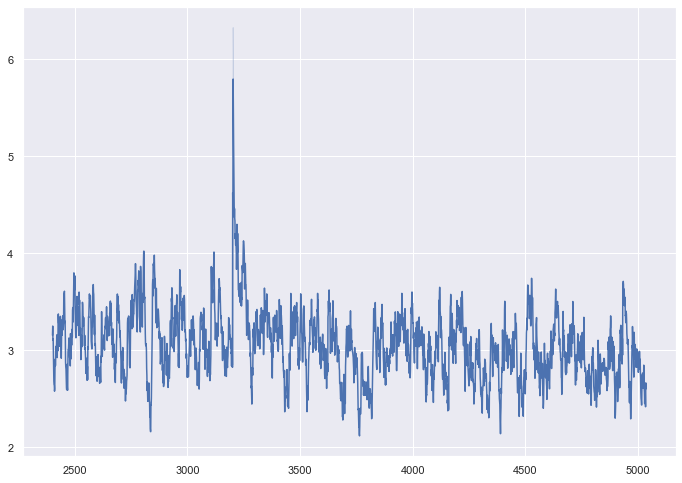

In [8]:
read_and_show_logs(list_logs_path)

In [5]:
list_logs_path = glob.glob("logs_second_try/*.log")
list_logs_path

['logs_second_try\\output_10100_re.log',
 'logs_second_try\\output_11100_re.log',
 'logs_second_try\\output_12000_re.log',
 'logs_second_try\\output_1500_re.log',
 'logs_second_try\\output_3500_re.log',
 'logs_second_try\\output_5000_re.log',
 'logs_second_try\\output_7000_re.log',
 'logs_second_try\\output_9300_re.log']

c:\users\sekigahara\anaconda3\envs\sekigahara\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


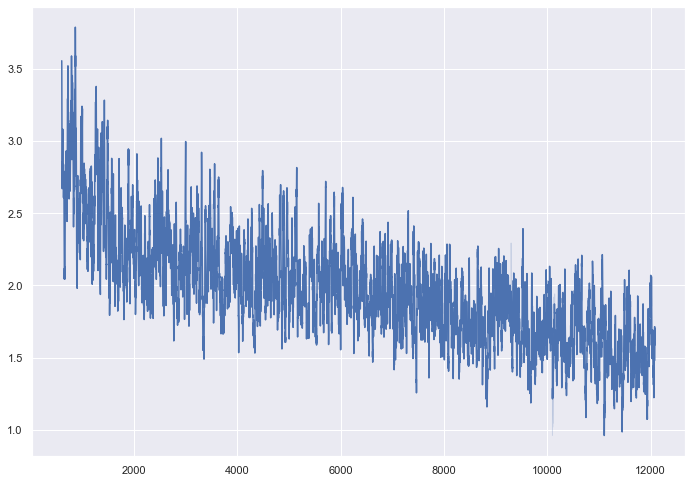

In [6]:
read_and_show_logs(list_logs_path)

In [7]:
list_logs_path = glob.glob("logs_third_try/*.log")
list_logs_path

['logs_third_try\\output_10200_reh.log',
 'logs_third_try\\output_12300_reh.log',
 'logs_third_try\\output_12900_reh.log',
 'logs_third_try\\output_16000_reh.log',
 'logs_third_try\\output_19300_reh.log',
 'logs_third_try\\output_21300_reh.log',
 'logs_third_try\\output_24000_reh.log',
 'logs_third_try\\output_25500_reh.log',
 'logs_third_try\\output_27600_reh.log',
 'logs_third_try\\output_30000_reh.log',
 'logs_third_try\\output_32000_reh.log',
 'logs_third_try\\output_34000_reh.log',
 'logs_third_try\\output_8800_reh.log',
 'logs_third_try\\output_9900_reh.log']

c:\users\sekigahara\anaconda3\envs\sekigahara\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


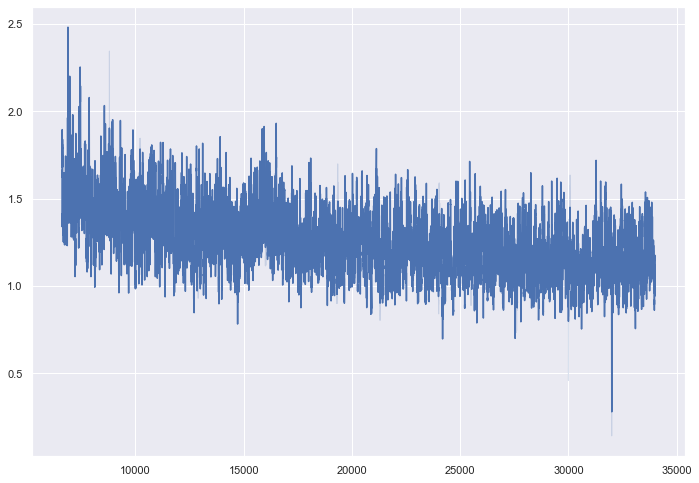

In [8]:
read_and_show_logs(list_logs_path)